# Nova Lite with v2.13 prompt

This notebook outlines the steps undertook to generate a prediction using Nova Lite with prompt from 2/13/25.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from prediction_utils import predict
from evaluate_predictions import show_metrics

from instructions import nova_instructions_v213
MODEL_ID = "us.amazon.nova-pro-v1:0"
SYSTEM_PROMPT = nova_instructions_v213

# Load the data

In [2]:
df = pd.read_csv("data/dataset.csv")
df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN


# Use the model to generation predictions

In [3]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:root:Completed: 2
INFO:root:Completed: 3
INFO:root:Completed: 1
INFO:root:Completed: 4
INFO:root:Completed: 0
INFO:root:Completed: 5
INFO:root:Completed: 6
INFO:root:Completed: 7
INFO:root:Completed: 8
INFO:root:Completed: 9
INFO:root:Completed: 10
INFO:root:Completed: 12
INFO:root:Completed: 11
INFO:root:Completed: 13
INFO:root:Completed: 14
INFO:root:Completed: 16
INFO:root:Completed: 18
INFO:root:Completed: 17
INFO:root:Completed: 15
INFO:root:Completed: 19
INFO:root:Completed: 23
INFO:root:Completed: 22
INFO:root:Completed: 21
INFO:root:Completed: 20
INFO:root:Completed: 24
INFO:root:Completed: 25
INFO:root:Completed: 26
INFO:root:Completed: 27
INFO:root:Completed: 28
INFO:root:Completed: 30


CPU times: user 1min 5s, sys: 4.09 s, total: 1min 9s
Wall time: 7min 53s


[{'0003.91306_cites_87633.txt': {'model': 'us.amazon.nova-pro-v1:0',
   'input_tokens': 2113,
   'output_tokens': 72,
   'prediction': 'no',
   'confidence': 0.95,
   'rationale': 'The passage discusses the rules established in the Target Case and reaffirms them, indicating that the Target Case has not been overruled. There are no Explicit or Implicit Negative Actions against the Target Case in the passage.',
   'raw_results': '```json\n{\n  "overruled": "no",\n  "confidence": 0.95,\n  "rationale": "The passage discusses the rules established in the Target Case and reaffirms them, indicating that the Target Case has not been overruled. There are no Explicit or Implicit Negative Actions against the Target Case in the passage."\n}\n```'}},
 {'0004.91306_cites_88240.txt': {'model': 'us.amazon.nova-pro-v1:0',
   'input_tokens': 2073,
   'output_tokens': 93,
   'prediction': 'no',
   'confidence': 0.95,
   'rationale': 'The passage discusses the reconsideration and affirmation of the ground

In [4]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions 
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0003.91306_cites_87633.txt,us.amazon.nova-pro-v1:0,2113,72,no,0.95,The passage discusses the rules established in...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
1,0004.91306_cites_88240.txt,us.amazon.nova-pro-v1:0,2073,93,no,0.95,The passage discusses the reconsideration and ...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0002.91306_cites_88994.txt,us.amazon.nova-pro-v1:0,2592,92,no,0.95,"The passage discusses the Target Case, Vermily...","```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0005.91306_cites_88693.txt,us.amazon.nova-pro-v1:0,2073,107,no,0.95,The passage discusses the reliance on the Targ...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0001.91306_cites_88061.txt,us.amazon.nova-pro-v1:0,2868,111,yes,0.95,The passage explicitly states that the origina...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."


## Save the raw prediction results

In [5]:
prediction_df.to_csv("predictions/5.amazon/2.nova_pro_v213_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [6]:
prediction_df["prediction"].isna().sum()

0

In [19]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
prediction_df = pd.read_csv("predictions/5.amazon/2.nova_pro_v213_prompt.csv")

In [20]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [21]:
assert len(df) == len(prediction_df)

In [22]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,us.amazon.nova-pro-v1:0,2868,111,yes,0.95,The passage explicitly states that the origina...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,us.amazon.nova-pro-v1:0,2592,92,no,0.95,"The passage discusses the Target Case, Vermily...","```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,us.amazon.nova-pro-v1:0,2113,72,no,0.95,The passage discusses the rules established in...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,us.amazon.nova-pro-v1:0,2073,93,no,0.95,The passage discusses the reconsideration and ...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,us.amazon.nova-pro-v1:0,2073,107,no,0.95,The passage discusses the reliance on the Targ...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


# Run evaluation

In [23]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [24]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [25]:
eval_df["prediction"].value_counts()

prediction
no     863
yes    221
Name: count, dtype: int64

In [26]:
eval_df["input_tokens"].sum()

3576150

In [27]:
eval_df["output_tokens"].sum()

104504

In [28]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0, "partially": 1, 0: 0})

In [29]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.95      0.87      0.91       935
         Yes       0.47      0.70      0.56       149

    accuracy                           0.85      1084
   macro avg       0.71      0.79      0.74      1084
weighted avg       0.88      0.85      0.86      1084



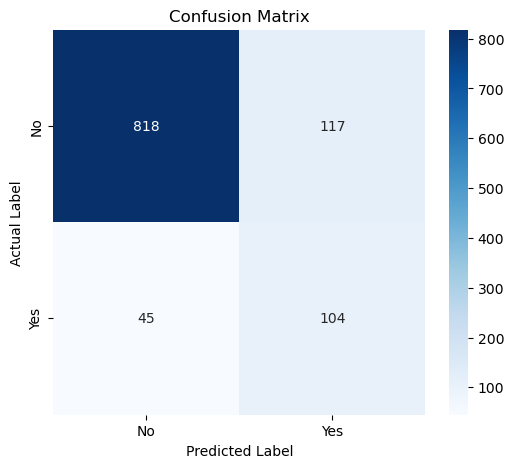

In [30]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [31]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.85
Precision: 0.47
Recall: 0.70
F-score: 0.56
Specificity: 0.87
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 104
True negatives: 818
False positives: 117
False negatives: 45


In [32]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

117

In [33]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

45

# Save the evaluation df

In [34]:
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,us.amazon.nova-pro-v1:0,2868,111,yes,0.95,The passage explicitly states that the origina...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,us.amazon.nova-pro-v1:0,2592,92,no,0.95,"The passage discusses the Target Case, Vermily...","```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,us.amazon.nova-pro-v1:0,2113,72,no,0.95,The passage discusses the rules established in...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,us.amazon.nova-pro-v1:0,2073,93,no,0.95,The passage discusses the reconsideration and ...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,us.amazon.nova-pro-v1:0,2073,107,no,0.95,The passage discusses the reliance on the Targ...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


In [35]:
eval_df.to_csv("predictions/5.amazon/2.nova_pro_v213_prompt_eval.csv", index=False)